# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/home-credit-default-risk/'

In [2]:
f_app = os.path.join(dir_data,'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.shape

(307511, 122)

In [3]:
# LabelEncoder()用法：
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# 將只有 兩種值以下 的 類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
a = 0
for col in app_train:
    if app_train[col].dtype == np.dtype('object'):
        # 如果只有兩種值的類別型欄位
        if len(app_train[col].unique()) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train["DAYS_EMPLOYED"].replace({365243:np.nan} , inplace=True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
at_c_TARGET = app_train.corr()['TARGET'] #a代表app；t代表train；c代表corr
at_c_TARGET
at_c_TARGET_df = pd.DataFrame(at_c_TARGET)
at_c_TARGET_df

,TARGET
SK_ID_CURR,-0.002108
TARGET,1.000000
NAME_CONTRACT_TYPE,-0.030896
FLAG_OWN_CAR,-0.021851
FLAG_OWN_REALTY,-0.006148
CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,-0.030369
AMT_ANNUITY,-0.012817
AMT_GOODS_PRICE,-0.039645


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
# 目標 (TARGET) 與所有欄位之間的相關係數中，數值最小的前 15 個
at_c_TARGET_df.sort_values(by=['TARGET'] , ascending=False)[1:16] #因為第0個row是TARGET，故從第1個row開始列

,TARGET
DAYS_EMPLOYED,0.074958
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346
DAYS_REGISTRATION,0.041975


In [7]:
# 目標 (TARGET) 與所有欄位之間的相關係數中，數值最小的前 15 個
at_c_TARGET_df.sort_values(by=['TARGET']).head(15)

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,-0.078239
DAYS_EMPLOYED_ANOM,-0.045987
FLOORSMAX_AVG,-0.044003
FLOORSMAX_MEDI,-0.043768
FLOORSMAX_MODE,-0.043226
AMT_GOODS_PRICE,-0.039645
REGION_POPULATION_RELATIVE,-0.037227


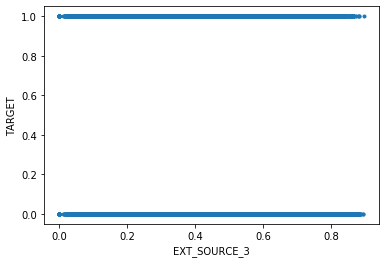

In [8]:
# 以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來
plt.plot(app_train['EXT_SOURCE_3'] , app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

In [9]:
type(app_train)

pandas.core.frame.DataFrame

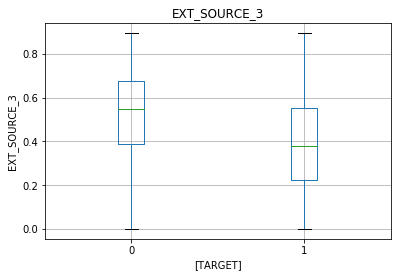

In [10]:
# 使用箱線圖分析資料
plt_column = ['EXT_SOURCE_3']
plt_by = ['TARGET']

app_train.boxplot(column = plt_column, by = plt_by).set_ylabel('EXT_SOURCE_3')
# set_ylabel的用法：
# https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

# get rid of "title"
# https://garden.vsupalov.com/writing/old/get-rid-of-the-automatic-pandas-generated-boxplot-title/
plt.suptitle('')
plt.show()

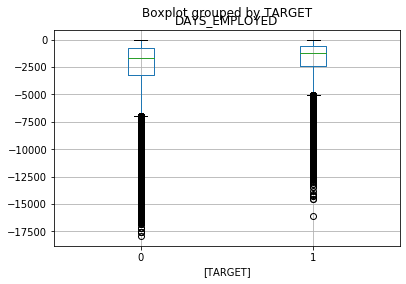

In [11]:
plt_column = ['DAYS_EMPLOYED']
plt_by = ['TARGET']
app_train[app_train['DAYS_EMPLOYED'].notnull()].boxplot(column = plt_column, by = plt_by)
plt.show()

In [12]:
app_train.groupby('TARGET')['DAYS_EMPLOYED'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,230302.0,-2438.140133,2372.409464,-17912.0,-3254.0,-1691.0,-789.0,0.0
1,21835.0,-1814.918800,1849.740650,-16069.0,-2380.5,-1230.0,-594.0,0.0


TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DAYS_EMPLOYED, dtype: object

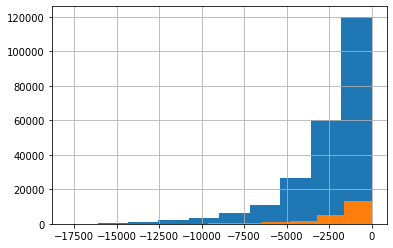

In [13]:
app_train.groupby('TARGET')['DAYS_EMPLOYED'].hist()